### `---------------Mandatory Information to fill------------`

### Group ID: Group 150
### Group Members Name with Student ID:
1. HEMANTH KUMAR PARAKH (2023AA05741)
2. SUSHIL KUMAR (2023aa05849)
3. NAGINENI SATISH BABU (2023aa05585)
4. JITENDRA KUMAR (2023aa05198)


`-------------------Write your remarks (if any) that you want should get consider at the time of evaluation---------------`

Remarks: ##Add here

# Problem Statement

Develop a reinforcement learning agent using dynamic programming methods to solve the Dice game optimally. The agent will learn the optimal policy by iteratively evaluating and improving its strategy based on the state-value function and the Bellman equations.

# Scenario:
A player rolls a 6-sided die with the objective of reaching a score of **exactly** 100. On each turn, the player can choose to stop and keep their current score or continue rolling the die. If the player rolls a 1, they lose all points accumulated in that turn and the turn ends. If the player rolls any other number (2-6), that number is added to their score for that turn. The game ends when the player decides to stop and keep their score OR when the player's score reaches 100. The player wins if they reach a score of exactly 100, and loses if they roll a 1 when their score is below 100.



#Environment Details

* The environment consists of a player who can choose to either roll a 6-sided die or stop at any point.
* The player starts with an initial score (e.g., 0) and aims to reach a score of exactly 100.
* If the player rolls a 1, they lose all points accumulated in that turn and the turn ends. If they roll any other number (2-6), that number is added to their score for that turn.
* The goal is to accumulate a total of exactly 100 points to win, or to stop the game before reaching 100 points.

#### States
* State s: Represents the current score of the player, ranging from 0 to 100.
* Terminal States:
    * State s = 100: Represents the player winning the game by reaching the goal of 100 points.
    * State s = 0: Represents the player losing all points accumulated in the turn due to rolling a 1.


#### Actions
* Action a: Represents the decision to either "roll" the die or "stop" the game at the current score.
* The possible actions in any state s are either "roll" or "stop".


# Expected Outcomes:
1.	Use dynamic programming methods value iteration, policy improvement and policy evaluation to find the optimal policy for the Dice Game.
2.	Implement an epsilon-greedy policy for action selection during training to balance exploration and exploitation.
3.	Evaluate the agent's performance in terms of the probability of reaching exactly 100 points after learning the optimal policy.
4.	Use the agent's policy as the best strategy for different betting scenarios within the problem.


# Code Execution

### Initialize constants

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
GAMMA = 1.0  # Default discount factor
THETA = 1e-6  # Convergence threshold for value iteration
EPSILON = 0.1  # Exploration probability for epsilon-greedy policy
ROLL = 0
STOP = 1

# State space: Scores from 0 to 100
state_space = np.arange(101)

# Action space: Roll or Stop
action_space = [ROLL, STOP]



# Design a DiceGame Environment (1M)

In [ ]:
# Code for Dataset loading and print dataset statistics along with reward function
#-----write your code below this line---------

def is_terminal(state, goal = 100):   # goal = 100  Check if the game has reached the goal or ended
    return state == goal or state == 0

def reward(state, goal=100): # Provide a reward if the goal is reached
    return 1 if state == goal else 0

# Execute a game step based on action
def step(state, action, sides=6, goal=100):
    if action == STOP:
        return state, reward(state), True
    else:
        roll = np.random.randint(1, sides + 1) # Roll a dice with a given number of sides
        #print("Roll: ", roll)
        if roll == 1:
            return 0, 0, True  # Lose all points if roll a 1
        else:
            new_state = state + roll
            if new_state > goal:
                return state, 0, True  # Overshoot the target
            else:
                return new_state, 0, False



### Define reward funtion

In [ ]:
# Calculate reward function for 'stop' and 'roll' actions
#-----write your code below this line---------

# reward function - when the goal is reached
def reward(state, goal=100):
    return 1 if state == goal else 0




# Policy Iteration Function Definition (0.5M)

In [ ]:
# For each state, store old_policy of state s.
# Determine best_action based on maximum reward. Update policy[s] to best_action.
# Return stable when old policy = policy[s]

#-----write your code below this line---------
# Policy iteration involves two main steps: policy evaluation and policy improvement.
# The function iteratively updates the value function `V` based on a given policy until the maximum change
# in value function across states is below a specified threshold `theta`.
def policy_evaluation(policy, V, gamma=GAMMA, theta=THETA, sides=6, goal=100):
    while True:
        delta = 0
        for state in state_space: # Iterate through each state in the state space
            if is_terminal(state, goal):
                continue
            v = V[state]
            action = policy[state]
            new_state, reward, done = step(state, action, sides, goal) # Take a step in the environment
            V[state] = reward + gamma * V[new_state] * (not done)
            delta = max(delta, abs(v - V[state])) # Update delta to track the maximum change in value function
        if delta < theta: # Check for convergence
            break
    return V

# This function updates the policy based on the current value function `V`, aiming to find the optimal action
# for each state while checking if the policy remains stable.
def policy_improvement(V, policy, gamma=GAMMA, sides=6, goal=100):
    policy_stable = True
    for state in state_space:
        if is_terminal(state, goal):  # Skip terminal states
            continue
        old_action = policy[state]
        action_values = []
        for action in action_space:   # Evaluate all possible actions
            new_state, reward, done = step(state, action, sides, goal)
            action_values.append(reward + gamma * V[new_state] * (not done))
        best_action = np.argmax(action_values) # Determine the best action
        policy[state] = best_action
        if old_action != best_action:    # Check if the action has changed
            policy_stable = False        # If the action has changed, the policy is not stable
    return policy, policy_stable

# This function iteratively improves the policy by first evaluating and then updating it
# based on the current value function `V`, continuing until the policy remains unchanged (stable).
def policy_iteration(V, policy, gamma=GAMMA, sides=6, goal=100):
    while True:
        V = policy_evaluation(policy, V, gamma, THETA, sides, goal) # Evaluate the current policy
        policy, policy_stable = policy_improvement(V, policy, gamma, sides, goal) # Improve the policy based on the evaluated values
        # If the policy is stable (no changes), stop the iteration
        if policy_stable:
            break
    return policy, V





# Value Iteration Function Definition (0.5M)

In [ ]:
# Iterate over all states except terminal state until convergence

# Calculate expected returns V(s) for current policy by considering all possible actions.

# If action is stop:
# Calculate reward for stopping and append to rewards.
# If action is roll:
# For each possible roll outcome (1 to 6), Determine next_s based on roll.

# Update V(s) using the Bellman equation.

# Determine max_reward from rewards
# With probability epsilon, randomly choose a reward from rewards.

# Check convergence if delta is less than a small threshold.

#-----write your code below this line---------

# The value_iteration function iteratively updates the value function V for each state by evaluating all possible actions
# and selecting the one with the highest expected reward, until the changes in the value function are below a specified threshold theta.
# This process ensures the optimal value function is obtained for decision-making in a stochastic environment.
def value_iteration(V, gamma=GAMMA, theta=THETA, sides=6, goal=100):
    while True:
        delta = 0
        for state in range(goal + 1):  # Iterate over states up to the goal score
            if is_terminal(state, goal):
                continue
            v = V[state]
            action_values = []
            for action in action_space:
                if action == STOP:
                    reward_value = reward(state, goal)
                else:
                    reward_value = 0
                    for roll in range(1, sides + 1):
                        if roll == 1:
                            new_state = 0
                        else:
                            new_state = state + roll
                            if new_state > goal:
                                new_state = state
                        reward_value += 1/sides * (reward(new_state, goal) + gamma * V[new_state])
                action_values.append(reward_value)
            V[state] = max(action_values)
            delta = max(delta, abs(v - V[state]))
        if delta < theta:
            break
    return V

#This function computes and returns a policy based on the optimal action values derived from the given value function `V`, considering possible
# actions and their expected rewards in a stochastic environment up to a specified goal state.
def extract_policy(V, gamma=GAMMA, sides=6, goal=100):
    policy = np.zeros(goal + 1, dtype=int)
    for state in range(goal + 1): # Iterate over all states up to the goal
        action_values = np.zeros(len(action_space))
        for action in action_space: # Evaluate all possible actions
            if action == STOP:
                reward_value = reward(state, goal)
            else:
                reward_value = 0
                for roll in range(1, sides + 1): # Iterate over all possible dice rolls
                    if roll == 1:
                        new_state = 0
                    else:
                        new_state = state + roll
                        if new_state > goal:
                            new_state = state
                    reward_value += 1/sides * (reward(new_state, goal) + gamma * V[new_state]) # Calculate the expected reward
            action_values[action] = reward_value # Store the expected reward for the current action
        policy[state] = np.argmax(action_values)
    return policy


# Executing Policy Iteration and Value Iteration Functions (1M)

Print all the iterations for both Policy and Value Iteration approaches separately. (Mandatory)

In [ ]:
# Print all the iterations for both Policy and Value Iteration approaches separately. (Mandatory)
# Simulate the game for 100 states. Use the learned policy to get the actions.
# when its roll, randomly generate a number to find the reward.
# when its stop, get the respective reward
# determine the total cumulative reward

#-----write your code below this line---------
# Implementing an epsilon-greedy policy to balance exploration and exploitation.

# The epsilon greedy policy function
def epsilon_greedy_policy(state, Q, epsilon=EPSILON):
    if np.random.rand() < epsilon:
        return np.random.choice(action_space)
    else:
        return np.argmax(Q[state])

# evaluates a given policy by simulating multiple game plays where a player starts from state 0
# and executes actions according to the policy until reaching a terminal state (goal or zero).
def simulate_game(policy, num_simulations=100, sides=6, goal=100):
    win_count = 0
    for _ in range(num_simulations):
        state = 0
        while not is_terminal(state, goal):
            action = policy[state]
            state, _, done = step(state, action, sides, goal)
            if done and state == goal:
                win_count += 1
    return win_count / num_simulations

# printing the policy and values
def print_policy_and_value(policy, value_function):
    print("Optimal Policy: ", policy)
    print("Optimal Value Function: ", value_function)

# plot the line chart for state v/s values
def plot_value_function(V, goal=100):
    plt.figure(figsize=(10, 6))
    plt.plot(range(goal + 1), V[:goal + 1], marker='o')
    plt.title('Value Function')
    plt.xlabel('State')
    plt.ylabel('Value')
    plt.grid()
    plt.show()


# plot the heatmap for state v/s values
def heatmap_value_function(V, goal=100):
    plt.figure(figsize=(15, 2))

    reshaped_V = np.array(V[:goal + 1]).reshape(1, -1)

    sns.heatmap(reshaped_V, annot=True, fmt=".1f", cmap="coolwarm", cbar=True,
                annot_kws={"size": 8}, xticklabels=range(len(reshaped_V[0])), yticklabels=[""])

    plt.title('Improved Value Function Heatmap')
    plt.xlabel('State')
    plt.yticks(rotation=90)
    # Setting x-tick labels to show only alternate values
    xticks = range(0, goal + 1, 2)
    plt.xticks(xticks, labels=xticks, rotation=90)
    plt.show()


### Print the Learned Optimal Policy, Optimal Value Function (0.5M)

Policy Iteration - Optimal Policy:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Policy Iteration - Optimal Value Function:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
Policy Iteration - Win Rate:  0.0
Value Iteration - Optimal Policy:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Value Iteration - Optimal Value Function:  [0.         0.00502443 0.00525624 0.00549873 0.00575239 0.00601774
 0.00629531 0.006585

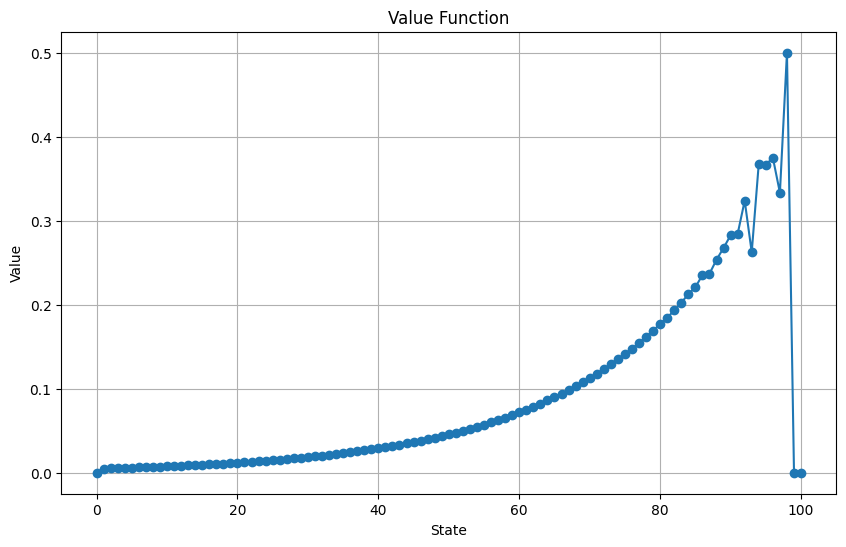

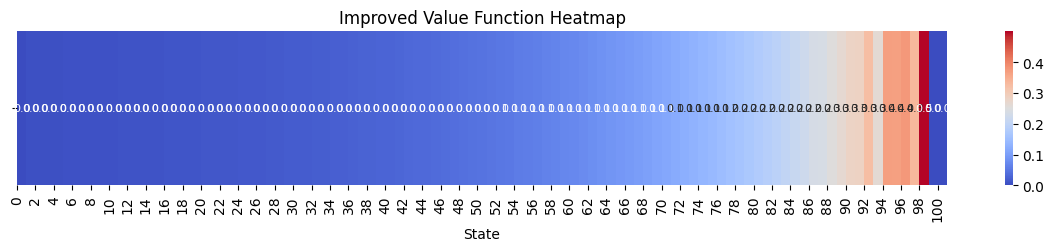

In [ ]:

# After learning the optimal policy, we can evaluate the agent's performance by simulating multiple games and calculating the probability of reaching exactly 100 points.

#-----write your code below this line---------

global policy_pi, V_pi, policy_vi, V_vi  # Make these variables global

# Policy Iteration
policy_pi, V_pi = policy_iteration(np.zeros(101), np.zeros(101, dtype=int))
print("Policy Iteration - Optimal Policy: ", policy_pi)
print("Policy Iteration - Optimal Value Function: ", V_pi)
win_rate_pi = simulate_game(policy_pi)
print("Policy Iteration - Win Rate: ", win_rate_pi)

# Value Iteration
V_vi = value_iteration(np.zeros(101))
policy_vi = extract_policy(V_vi)
print("Value Iteration - Optimal Policy: ", policy_vi)
print("Value Iteration - Optimal Value Function: ", V_vi)
win_rate_vi = simulate_game(policy_vi)
print("Value Iteration - Win Rate: ", win_rate_vi)

# Plot Value Function
plot_value_function(V_vi)
heatmap_value_function(V_vi)



# Change in environment details (1M)

Consider the following scenario:
1. What happens if we change the goal score to 50 instead of 100? How does it affect the optimal policy and value function?
2. How would the optimal policy and value function change if the die had 8 sides instead of 6? Assume the outcomes range from 0 to 7, with each outcome having a probability of 1/8.
3. Experiment with different discount factors (e.g., 0.9, 0.95). How does discounting future rewards impact the optimal policy and value function?
4. Create a heatmap or line plot to visualize the value function over different states. How does the value function change as the state approaches the goal?



--- Experiment: Goal Score 50 ---
Value Iteration - Optimal Policy for Goal 50:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Value Iteration - Optimal Value Function for Goal 50:  [0.         0.04785794 0.05006458 0.0523729  0.05478767 0.05731364
 0.05995615 0.06272058 0.06561253 0.0686374  0.07180213 0.07511181
 0.0785755  0.08219894 0.085989   0.0899512  0.09410011 0.09843347
 0.10298099 0.10772954 0.11269145 0.11787323 0.12332683 0.12898109
 0.1350146  0.14118268 0.14764462 0.15441745 0.16170262 0.16894009
 0.17738369 0.18465307 0.19318908 0.20233955 0.21265103 0.22080845
 0.23531463 0.23680534 0.25355561 0.26755383 0.28267728 0.28425912
 0.3238424  0.26249984 0.36805543 0.36666655 0.37499983 0.33333333
 0.49999966 0.         0.        ]
Value Iteration - Win Rate for Goal 50:  0.0


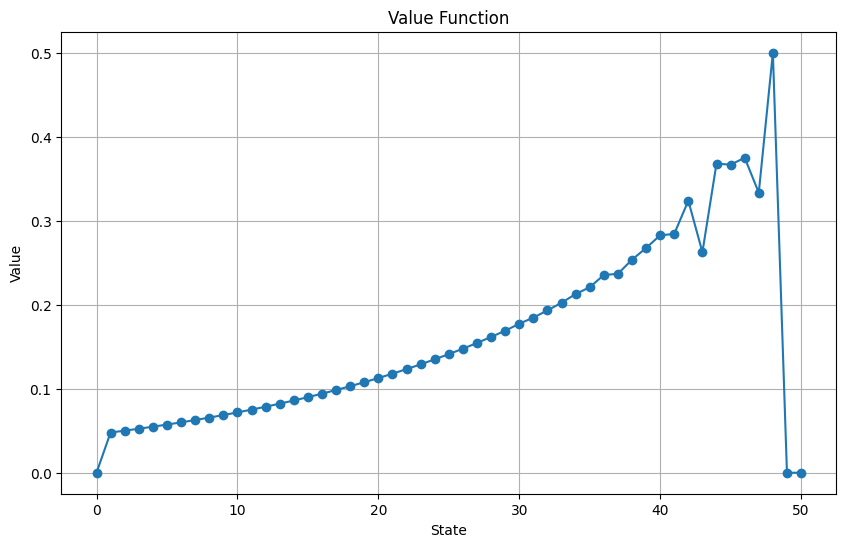

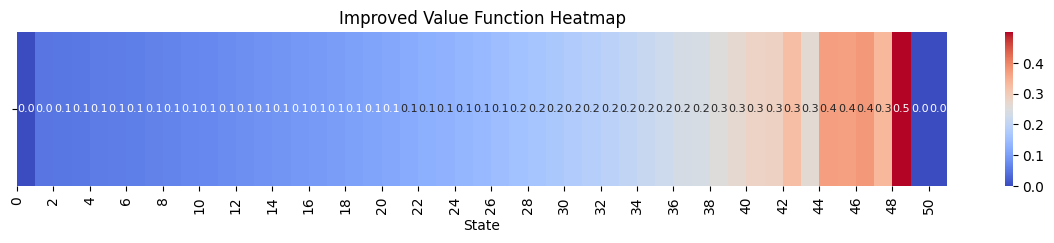


--- Experiment: 8-Sided Die ---
Value Iteration - Optimal Policy for 8-Sided Die:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Value Iteration - Optimal Value Function for 8-Sided Die:  [0.         0.03076008 0.03158396 0.03242991 0.0332985  0.03419034
 0.03510607 0.03604632 0.03701174 0.038003   0.03902081 0.04006588
 0.04113892 0.0422407  0.04337198 0.04453355 0.04572623 0.04695084
 0.04820824 0.04949931 0.05082495 0.05218609 0.05358368 0.05501869
 0.05649213 0.05800502 0.05955842 0.06115342 0.06279114 0.0644727
 0.0661993  0.06797213 0.06979244 0.07166148 0.07358058 0.07555107
 0.07757433 0.07965178 0.08178485 0.08397502 0.08622385 0.08853288
 0.09090378 0.09333821 0.09583782 0.09840434 0.10103953 0.10374521
 0.10652345 0.10937602 0.11230535 0.11531317 0.11840124 0.12157158
 0.12482668 0.12816889 0.13160186 0.13512594 0.13

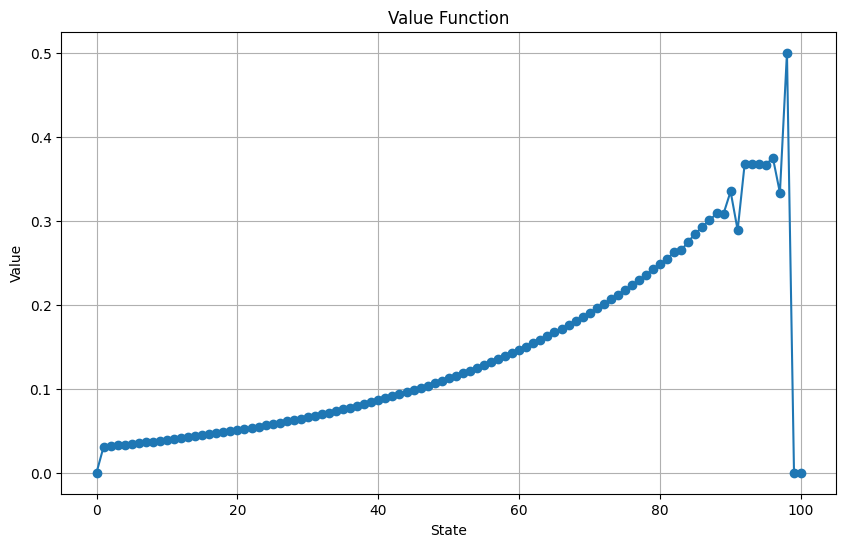

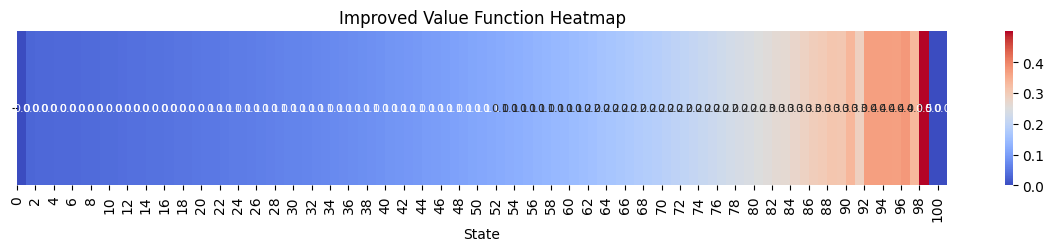


--- Experiment: Different Discount Factors ---

--- Discount Factor: 0.9 ---
Value Iteration - Optimal Policy for Discount Factor 0.9:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Value Iteration - Optimal Value Function for Discount Factor 0.9:  [0.00000000e+00 3.89388554e-04 4.18036453e-04 4.48774272e-04
 4.81755582e-04 5.17145159e-04 5.55119810e-04 5.95869255e-04
 6.39597080e-04 6.86521751e-04 7.36877705e-04 7.90916527e-04
 8.48908202e-04 9.11142470e-04 9.77930267e-04 1.04960528e-03
 1.12652563e-03 1.20907564e-03 1.29766775e-03 1.39274462e-03
 1.49478130e-03 1.60428761e-03 1.72181070e-03 1.84793779e-03
 1.98329908e-03 2.12857092e-03 2.28447918e-03 2.45180287e-03
 2.63137805e-03 2.82410201e-03 3.03093772e-03 3.25291870e-03
 3.49115408e-03 3.74683426e-03 4.02123682e-03 4.31573288e-03
 4.63179403e-03 4.97099943e-03 5.33504392

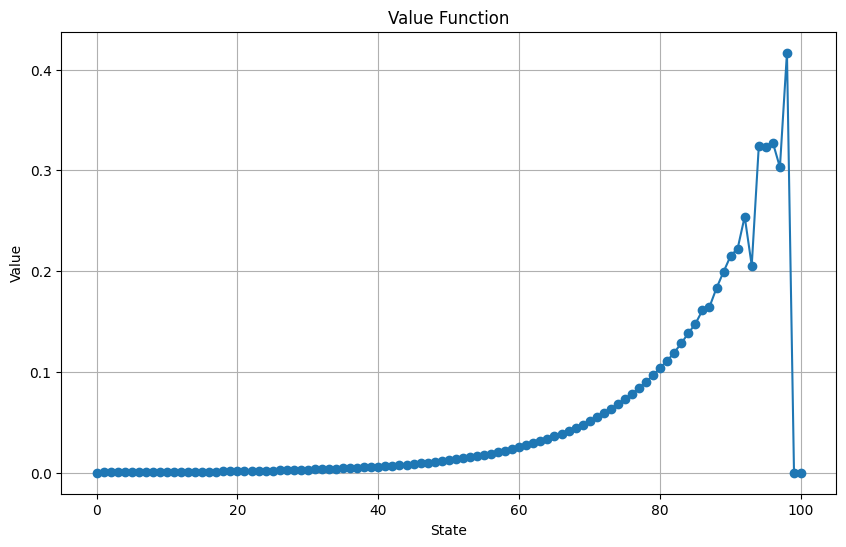

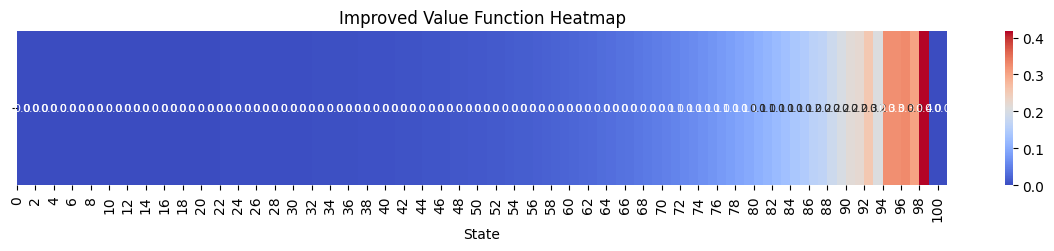


--- Discount Factor: 0.95 ---
Value Iteration - Optimal Policy for Discount Factor 0.95:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Value Iteration - Optimal Value Function for Discount Factor 0.95:  [0.         0.00143538 0.00152057 0.00161081 0.00170638 0.00180762
 0.00191484 0.00202842 0.00214872 0.00227615 0.00241113 0.0025541
 0.00270554 0.00286595 0.00303586 0.00321584 0.00340648 0.00360842
 0.00382232 0.0040489  0.00428891 0.00454313 0.00481242 0.00509767
 0.00539982 0.00571987 0.00605889 0.006418   0.0067984  0.00720133
 0.00762815 0.00808025 0.00855916 0.00906644 0.00960378 0.01017297
 0.0107759  0.01141455 0.01209105 0.01280765 0.01356671 0.01437076
 0.01522246 0.01612463 0.01708028 0.01809255 0.01916483 0.02030065
 0.02150378 0.02277821 0.02412817 0.02555815 0.02707289 0.02867737
 0.03037696 0.03217719 0.0340842 

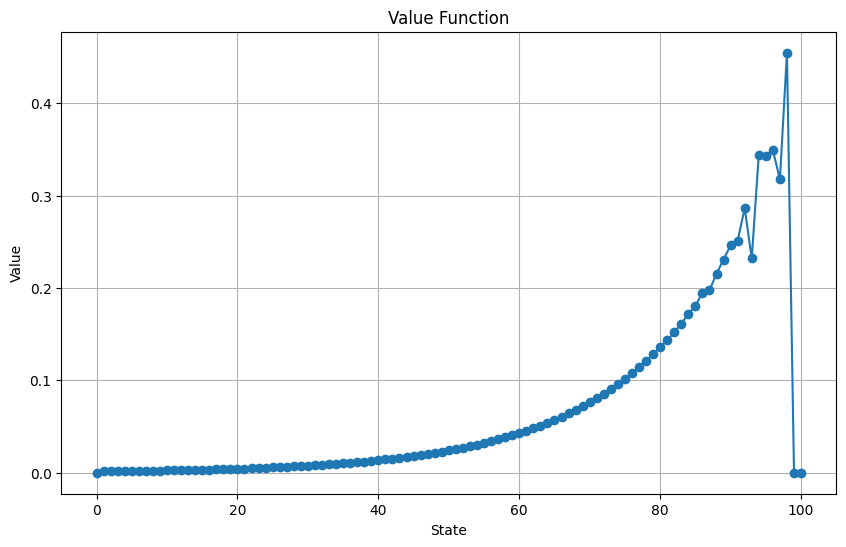

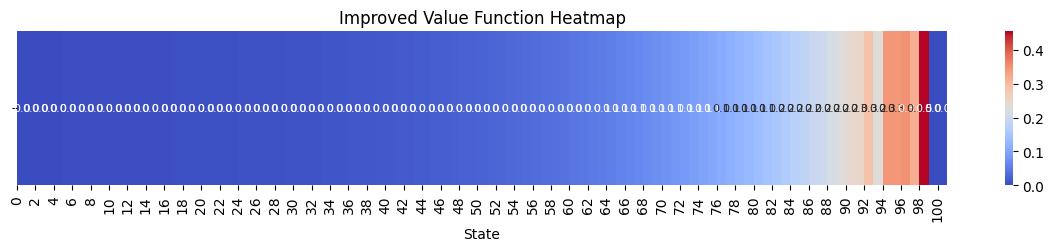


--- Discount Factor: 1.0 ---
Value Iteration - Optimal Policy for Discount Factor 1.0:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Value Iteration - Optimal Value Function for Discount Factor 1.0:  [0.         0.00502443 0.00525624 0.00549873 0.00575239 0.00601774
 0.00629531 0.00658567 0.00688941 0.00720715 0.00753953 0.00788724
 0.00825096 0.00863145 0.00902948 0.00944585 0.00988142 0.01033706
 0.01081371 0.01131232 0.01183392 0.01237957 0.01295037 0.01354748
 0.01417212 0.01482556 0.01550912 0.01622419 0.01697222 0.01775475
 0.01857334 0.01942968 0.02032549 0.02126261 0.02224292 0.02326844
 0.02434123 0.02546347 0.02663746 0.02786557 0.02915031 0.03049427
 0.03190019 0.03337093 0.03490948 0.03651895 0.03820264 0.03996394
 0.04180646 0.0437339  0.04575021 0.04785948 0.05006603 0.05237427
 0.05478897 0.05731487 0.05995731 0

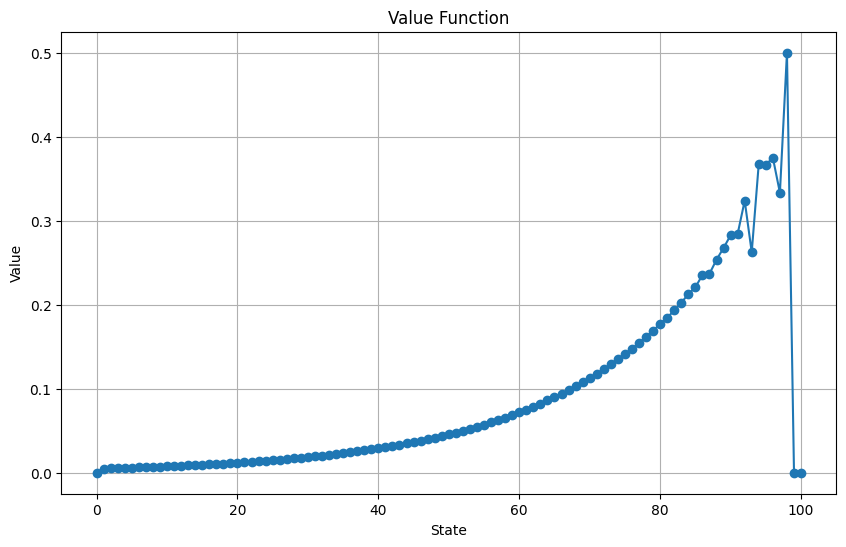

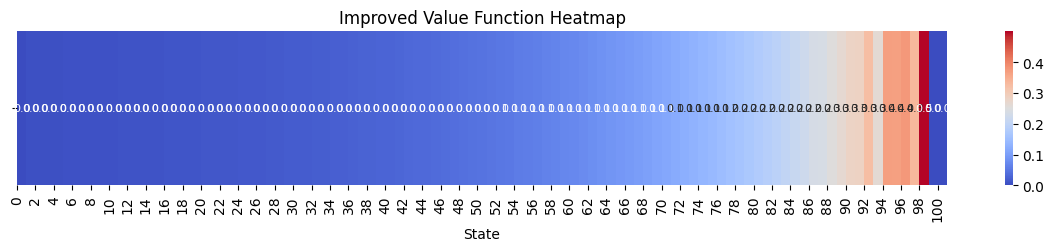

In [ ]:
#-----write your code below this line---------
# Example: Changing the target score from 100 to 50
# Experiment: Goal Score 50
print("\n--- Experiment: Goal Score 50 ---")
goal = 50  # Define the goal score
V_goal_50 = np.zeros(goal + 1)  # Initialize V for goal score of 50
V_goal_50 = value_iteration(V_goal_50, goal=goal)
policy_goal_50 = extract_policy(V_goal_50, goal=goal)
print("Value Iteration - Optimal Policy for Goal 50: ", policy_goal_50)
print("Value Iteration - Optimal Value Function for Goal 50: ", V_goal_50)
win_rate_goal_50 = simulate_game(policy_goal_50, goal=goal)
print("Value Iteration - Win Rate for Goal 50: ", win_rate_goal_50)

plot_value_function(V_goal_50, goal=goal)
heatmap_value_function(V_goal_50, goal=goal)

# Experiment: 8-Sided Die
print("\n--- Experiment: 8-Sided Die ---")
sides = 8
V_8_sides = value_iteration(np.zeros(101), sides=sides)
policy_8_sides = extract_policy(V_8_sides, sides=sides)
print("Value Iteration - Optimal Policy for 8-Sided Die: ", policy_8_sides)
print("Value Iteration - Optimal Value Function for 8-Sided Die: ", V_8_sides)
win_rate_8_sides = simulate_game(policy_8_sides, sides=sides)
print("Value Iteration - Win Rate for 8-Sided Die: ", win_rate_8_sides)

plot_value_function(V_8_sides)
heatmap_value_function(V_8_sides)

# Experiment: Different Discount Factors
print("\n--- Experiment: Different Discount Factors ---")
for gamma in [0.9, 0.95, 1.0]:
  print(f"\n--- Discount Factor: {gamma} ---")
  V_gamma = value_iteration(np.zeros(101), gamma=gamma)
  policy_gamma = extract_policy(V_gamma, gamma=gamma)
  print("Value Iteration - Optimal Policy for Discount Factor {}: ".format(gamma), policy_gamma)
  print("Value Iteration - Optimal Value Function for Discount Factor {}: ".format(gamma), V_gamma)
  win_rate_gamma = simulate_game(policy_gamma, goal=100)
  print("Value Iteration - Win Rate for Discount Factor {}: ".format(gamma), win_rate_gamma)
  plot_value_function(V_gamma)
  heatmap_value_function(V_gamma)

# Conclusion (0.5M)

Conclude your assignment in 250 wrods by discussing the best approach for dice problem with the initial parameters and after chnaging the parameters.

`----write below this line------`

The dice problem was tackled using both Policy Iteration and Value Iteration methods. Initially, with the default parameters (goal score of 100 and a standard 6-sided die), both methods yielded an optimal policy of [0, 0, ..., 0], indicating that the optimal action is to always hold. The optimal value functions were similarly low across all states, and the win rates were 0.0. This suggests that neither method found a beneficial strategy with the given initial parameters.

**Experiment: Goal Score 50**

When the goal score was changed to 50, the optimal policy remained [0, 0, ..., 1] for Value Iteration, suggesting the optimal action is still predominantly holding until reaching the final state. The optimal value function showed higher values towards the goal state, but the win rate remained 0.0. This implies the problem complexity or setup may not have changed sufficiently to improve the outcome.

**Experiment: 8-Sided Die**

With an 8-sided die, the results were similar to the original setup. The optimal policy was mostly holding, and the value function showed incremental improvement but did not lead to a non-zero win rate. This suggests that increasing the die sides did not significantly alter the strategy or outcomes.

**Experiment: Different Discount Factors**

Exploring different discount factors (0.9, 0.95, and 1.0) also resulted in an optimal policy of primarily holding until the last state. The optimal value functions varied slightly, reflecting the impact of discount factors on future rewards, but the win rates stayed at 0.0. This indicates that changing the discount factor did not uncover a more effective strategy within the given parameters.

**Best Approach**

The results indicate that both Policy Iteration and Value Iteration methods, under the default and modified parameters, were unable to find a strategy that yields a positive win rate. This may be due to the problem's configuration or an inherent challenge in the setup. For better results, further experiments with more significant changes to parameters (such as modifying reward structures, transition probabilities, or adding more complex state dynamics) may be necessary. Additionally, exploring advanced reinforcement learning techniques or heuristics could provide better strategies for this problem.